In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [159]:
N = 8

class Layer:
    
    x = np.zeros(N, np.int)
    y = np.zeros(N, np.int)
    z = np.zeros(N, np.int)
    
    def __init__(self, x=None, y=None, z=None):
        if x is not None: self.x = np.array(x)
        if y is not None: self.y = np.array(y)
        if z is not None: self.z = np.array(z)
            
    def __repr__(self):
        ret = ""
        ret += "x = %s\n" % repr(self.x)
        ret += "y = %s\n" % repr(self.y)
        ret += "z = %s\n" % repr(self.z)
        return(ret)
    
    def __getitem__(self, key):
        return((self.x[key], self.y[key], self.z[key]))
        

In [151]:
layer1 = Layer(y = list(range(-7,8, 2)))

layer2 = Layer(x = [4, -4] * 4,
               y = [-6, -6, -2, -2, 2, 2, 6, 6],
               z = layer1.z + 2)

layer3 = Layer(x = layer2.y, y = layer2.x, z = layer1.z + 4)

layer4 = Layer(x = layer1.y, y = layer1.x, z = layer1.z + 6)

layers = [layer1, layer2, layer3, layer4]

In [152]:
print(layer3); print(layer4)

x = array([-6, -6, -2, -2,  2,  2,  6,  6])
y = array([ 4, -4,  4, -4,  4, -4,  4, -4])
z = array([4, 4, 4, 4, 4, 4, 4, 4])

x = array([-7, -5, -3, -1,  1,  3,  5,  7])
y = array([0, 0, 0, 0, 0, 0, 0, 0])
z = array([6, 6, 6, 6, 6, 6, 6, 6])



In [134]:
def plot_connector(p1, p2, ax, fmt='k-', **kwargs):
    xs, ys, zs = zip(p1, p2)
    ax.plot(xs, ys, zs, fmt, **kwargs )

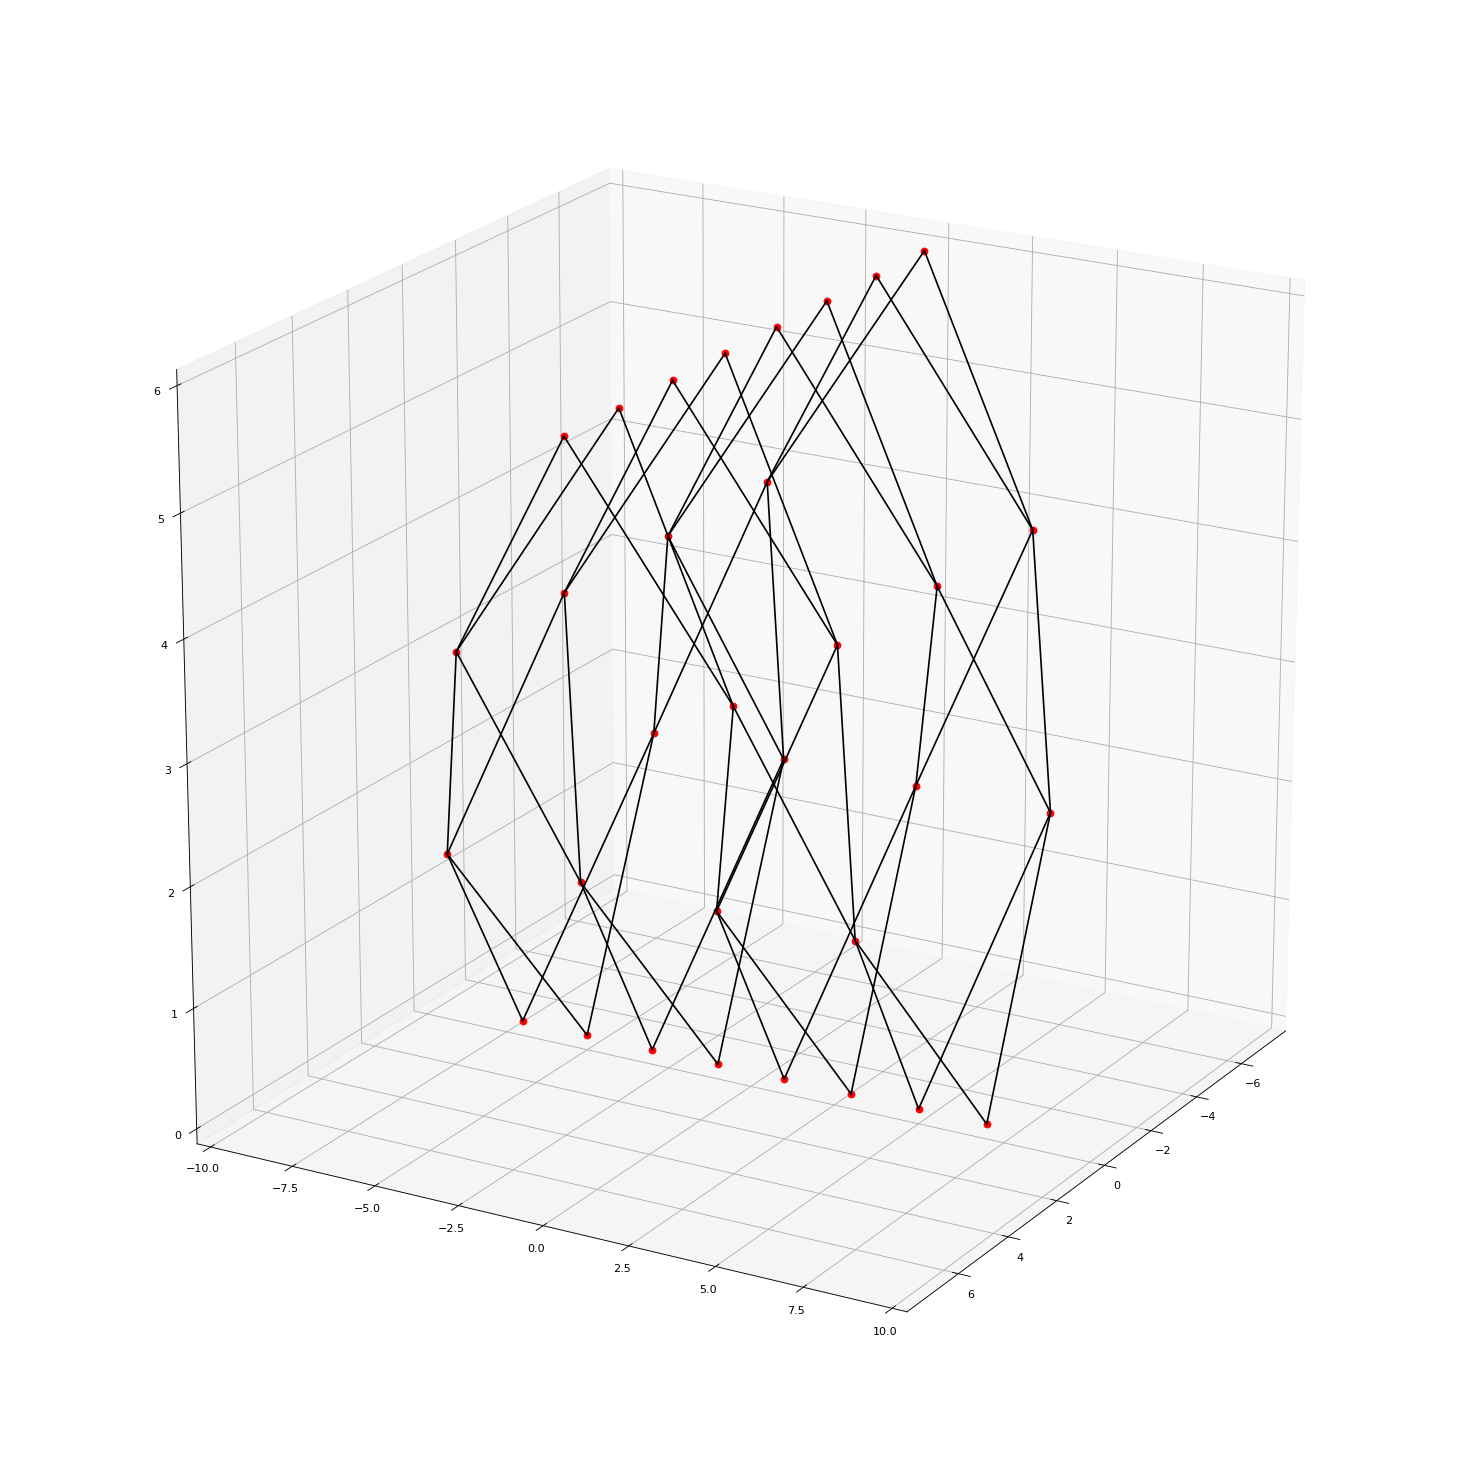

In [153]:
fig = plt.figure(figsize=(18,18), dpi=80)
ax = Axes3D(fig)
ax.set_ylim(-10,10)
ax.grid()

for layer in layers:
    ax.plot(layer.x, layer.y, layer.z,'ro')

def plot_layer_connector(idx1, idx2, l1, l2, ax, **kwargs):
    plot_connector(l1[idx1], l2[idx2], ax, **kwargs)
    
layer_1_2_edge_points = list(zip(
    (0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7),
    (0, 1, 0, 1, 2, 3, 2, 3, 4, 5, 4, 5, 6, 7, 6, 7)))

# connect points in layer1 to points in layer 2
for idx1, idx2 in layer_1_2_edge_points:
    plot_layer_connector(idx1, idx2, layer1, layer2, ax)

# We can use the same indexing to connect points in layer3 to layer 4
for idx1, idx2 in layer_1_2_edge_points:
    plot_layer_connector(idx1, idx2, layer3, layer4, ax)

layer_2_3_edge_points = zip( (0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7), 
                             (7, 5, 3, 1, 7, 5, 3, 1, 6, 4, 2, 0, 6, 4, 2, 0))
for idx1, idx2 in layer_2_3_edge_points:
    plot_layer_connector(idx1, idx2, layer2, layer3, ax)

    
ax.view_init(elev=20, azim=30)

## Lets create a new graph with just the top and bottom layers and make it bipartitet

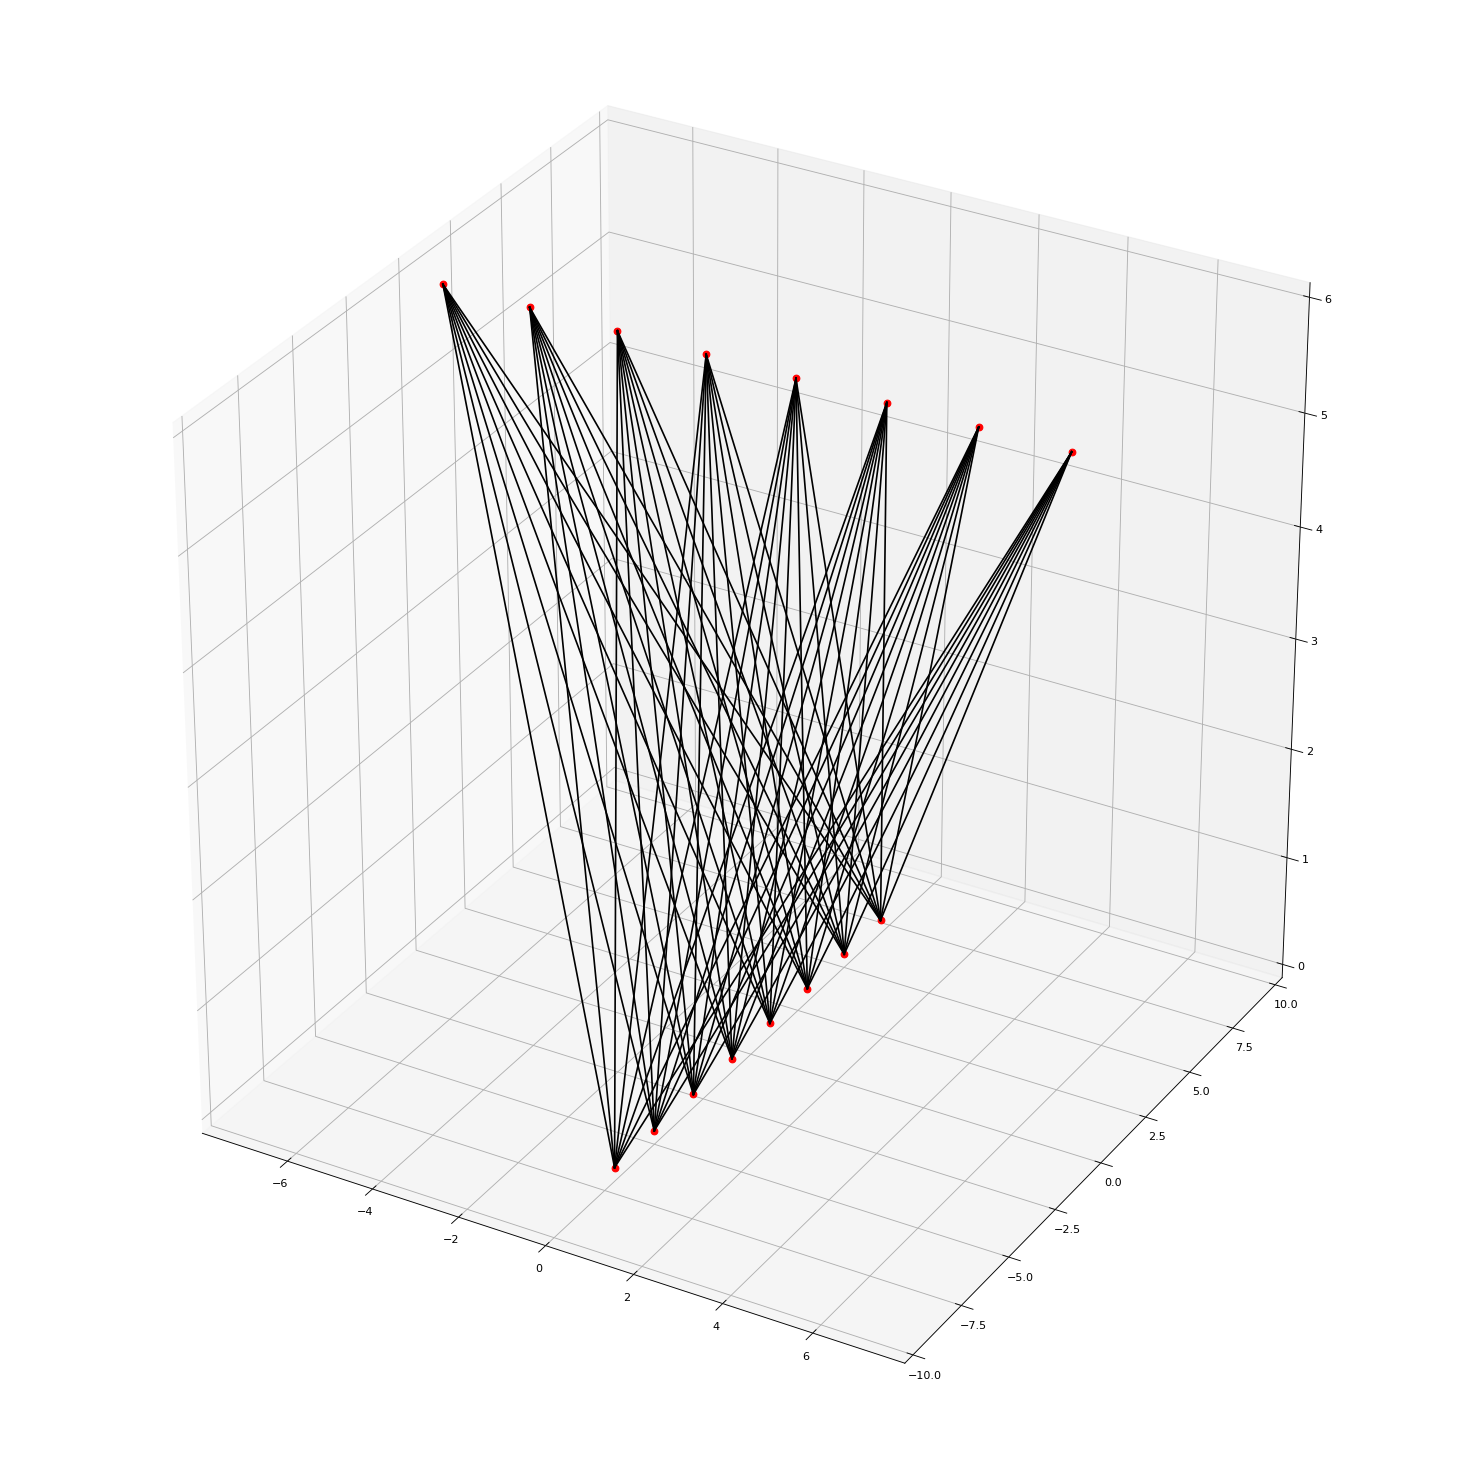

In [160]:
layers = [layer1, layer4]

fig = plt.figure(figsize=(18,18), dpi=80)
ax = Axes3D(fig)
ax.set_ylim(-10,10)
ax.grid()

for layer in layers:
    ax.plot(layer.x, layer.y, layer.z,'ro')

import itertools

for idx1, idx2 in itertools.product(range(N), range(N)):
    plot_layer_connector(idx1, idx2, layer1, layer4, ax)

In [161]:
#plt.savefig("graph2.png")
#plt.savefig("graph2.pdf")